# Environment Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.ExcelFile('DataDownload.xls')

# Goals and Objectives

The goal of this project is to study the distribution of SNAP benefits at country level and look into key drivers for high or low levels of benefit. In the specific we will build of model to predict the SNAP benefits per capita in 2015, given a set of food, store availability and county demographic features. The model will be at County Level.

The model will give us some key insights on any inequality in SNAP benefit distribution across counties. In particular we are interested in finding those Counties for which out model predicts a high level of SNAP benefit per capita, but that instead are underperforming. Those Counties should be the focus for State autorities. 

# Data Import

Data is taken from ..... [Add some information on data source]


In [ ]:
data = pd.ExcelFile('DataDownload.xls')

In [2]:
print(data.sheet_names)

['Read_Me', 'Variable List', 'Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'INSECURITY', 'PRICES_TAXES', 'LOCAL', 'HEALTH', 'SOCIOECONOMIC']


# Data Exploration

In this section we look into different pieces of the data ...

In [5]:
# The file contain metadata with variable meaning, this will help understanding which variable are more relevant
metadata = data.parse('Variable List')
metadata.head()

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent


### 1) Explore Assistance Tab

This Assistance Tab provides a set of variable related to the distribution of SNAP benefits across Counties and State. This is the part of the data where we will find our Target Variable. Which is the the variable we want to model and predict.

In [31]:
assistance = data.parse('ASSISTANCE')
assistance.head()

,FIPS,State,County,REDEMP_SNAPS12,REDEMP_SNAPS16,PCH_REDEMP_SNAPS_12_16,PCT_SNAP12,PCT_SNAP16,PCH_SNAP_12_16,PC_SNAPBEN10,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC15,PCH_WIC_09_15,PCT_CACFP09,PCT_CACFP15,PCH_CACFP_09_15,FDPIR12
0,1001,AL,Autauga,301432.081069,239024.015573,-20.703856,18.824675,16.976436,-1.848239,16.692321,...,161658.70,184744.3,14.280490,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
1,1003,AL,Baldwin,274394.503663,155844.390189,-43.204260,18.824675,16.976436,-1.848239,14.139211,...,125840.50,126639.4,0.634881,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
2,1005,AL,Barbour,325496.560766,281716.325972,-13.450291,18.824675,16.976436,-1.848239,27.558243,...,178230.60,157077.1,-11.868620,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
3,1007,AL,Bibb,356444.032000,256026.919660,-28.171916,18.824675,16.976436,-1.848239,20.128737,...,92542.33,98263.4,6.182112,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
4,1009,AL,Blount,229730.022632,141304.900673,-38.490886,18.824675,16.976436,-1.848239,19.157857,...,102945.90,149110.0,44.843050,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0


In [32]:
# This dataset contains many columns, let's see what they mean
assistance_variables = metadata[metadata['Variable Code'].isin(assistance.columns)]
assistance_variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
93,Food Assistance,ASSISTANCE,SNAP,"SNAP redemptions/SNAP-authorized stores, 2012",REDEMP_SNAPS12,CNTY10,Dollars/store
94,Food Assistance,ASSISTANCE,SNAP,"SNAP redemptions/SNAP-authorized stores, 2016",REDEMP_SNAPS16,CNTY10,Dollars/store
95,Food Assistance,ASSISTANCE,SNAP,SNAP redemptions/SNAP-authorized stores (% cha...,PCH_REDEMP_SNAPS_12_16,CNTY10,% change
96,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (% pop), 2012*",PCT_SNAP12,CNTY10,Percent
97,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (% pop), 2016*",PCT_SNAP16,CNTY10,Percent
98,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (change % pop), 2012-16*",PCH_SNAP_12_16,CNTY10,Percentage points
99,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita, 2010",PC_SNAPBEN10,CNTY10,Dollars/capita
100,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita, 2015",PC_SNAPBEN15,CNTY10,Dollars/capita
101,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita (% change), 2010-15",PCH_PC_SNAPBEN_10_15,CNTY10,% change
102,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (% eligible pop), 2008*",SNAP_PART_RATE08,CNTY10,Percent


The variable **PC_SNAPBEN15** is exactly our variable of interest. This is the variable that we want do predict given a set of features. 

As we can see below Counties have in average 17.6 dollars per capit, with a Max of 100 dollars per capita in some Counties. The data is not exactly distributed as a Gaussian, but is right skewed. We will make further exploration of this data in future notebooks

count    3059.000000
mean       17.625872
std         9.648528
min         0.863202
25%        10.601362
50%        16.146207
75%        22.638639
max       100.139353
Name: PC_SNAPBEN15, dtype: float64


Text(0.5, 1.0, 'Distribution of Snap Benefit Per Capita in 2015 Across different counties')

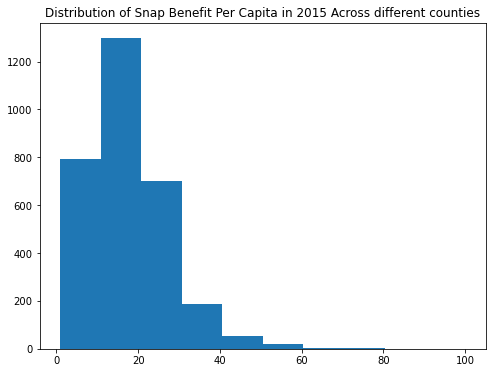

In [33]:
target = assistance['PC_SNAPBEN15']
print(target.describe())

# Plot Histogram
plt.figure(figsize = (8,6))
plt.hist(target)
plt.title("Distribution of Snap Benefit Per Capita in 2015 Across different counties")

After isolating the target variable we will give a closer look to the features available in the Assistance tab. We want to discard features that relate to period after 2015 and the features that are too far back in the past. We should be very cautious with including Assistance variable for 2015, since those could be too correlated with the target variable and cause Data Leakage https://www.analyticsvidhya.com/blog/2021/07/data-leakage-and-its-effect-on-the-performance-of-an-ml-model/

Therefore interesting features in this part of the data could be.

1. *REDEMP_SNAPS12* = SNAP redemptions/SNAP-authorized stores, 2012
2. *PCT_SNAP12* = SNAP participants (% pop), 2012*
3. *PC_SNAPBEN10* = SNAP participants (% pop), 2012*
4. *SNAP_PART_RATE13* = SNAP participants (% eligible pop), 2013
5. *PCT_FREE_LUNCH14* = Students eligible for free lunch (%), 2014
6. *PCT_REDUCED_LUNCH14* = Students eligible for reduced-price lunch (%),..
7. *PC_WIC_REDEMP12* = WIC redemptions per capita, 2012
8. *REDEMP_WICS12* = WIC redemptions/WIC-authorized stores


Now that we have isolated some variables let's look how they are distributed. In a later exploratory notebook we will make a deep dive analysis to see how those are correlated to the target variable.


In [36]:
# This dataset contains many columns, let's see what they mean
assistance_sub = assistance[['REDEMP_SNAPS12',
                             'PCT_SNAP12',
                             'PC_SNAPBEN10',
                             'SNAP_PART_RATE13',
                             'PCT_FREE_LUNCH14',
                             'PCT_REDUCED_LUNCH14',
                             'PC_WIC_REDEMP12',
                             'REDEMP_WICS12'
                            ]]

assistance_sub.describe()

,REDEMP_SNAPS12,PCT_SNAP12,PC_SNAPBEN10,SNAP_PART_RATE13,PCT_FREE_LUNCH14,PCT_REDUCED_LUNCH14,PC_WIC_REDEMP12,REDEMP_WICS12
count,2.901000e+03,3143.000000,3060.000000,3143.000000,2905.000000,2905.000000,2004.000000,2004.000000
mean,2.551360e+05,15.148961,18.614255,86.460281,45.975352,7.686163,19.154266,110173.598400
std,1.256706e+05,3.604832,9.572083,8.916914,18.089541,3.742588,9.881650,62915.262314
min,0.000000e+00,5.866367,1.013588,56.955000,0.000000,0.000000,0.139449,464.750000
25%,1.642409e+05,12.566062,11.367797,79.024000,33.333333,5.505033,13.037968,67183.202500
50%,2.577948e+05,15.223027,17.445385,86.331000,44.124491,7.730812,17.532905,99297.805000
75%,3.351987e+05,18.353499,24.124433,92.597000,55.671331,9.903968,23.411550,143023.850000
max,1.253321e+06,22.131516,76.284852,100.000000,100.000000,32.051282,131.366500,487424.000000


### 2) Explore ACCESS tab

### 3) Explore STORES tab

### 4) Explore RESTAURANTS tab

### 5) Explore ANY OTHER TAB

It seems doubtful that Farmers Markets are accessible enough to make a meaningful impact on food accessability to those with SNAP benefits

In [71]:
df5 = data.parse('Supplemental Data - County')
County = df5[['State', 'County', '2010 Census Population', 'Population Estimate, 2011', 
              'Population Estimate, 2012', 'Population Estimate, 2013', 
              'Population Estimate, 2014', 'Population Estimate, 2015', 'Population Estimate, 2016']].copy()

In [76]:
df5 = data.parse('Supplemental Data - County')
County = df5[['State', 'County', '2010 Census Population', 'Population Estimate, 2011', 
              'Population Estimate, 2012', 'Population Estimate, 2013', 
              'Population Estimate, 2014', 'Population Estimate, 2015', 'Population Estimate, 2016']].copy()

#GIOVANNI

# Convert strings pandas Series (columns in the dataframe) where values containe a Comma into a numerica values

County['2010 Census Population'] = [int(x.replace(",", "")) for x in County['2010 Census Population']]
print("Prove that is now converted to a numerical series" , County['2010 Census Population'].mean())

# DO THE SAME FOR ALL THE OTHER VARIABLES, YOU COULD ALSO DO CREATE A FUNCTION

def remove_comma_from_series(var):
    """explain what this function does
    
        Parametes
        ---------
        var: pandas Series
    """
    
    new_var = [int(x.replace(",", "")) for x in var ]
    
    return new_var


County = df5[['State', 'County', '2010 Census Population', 'Population Estimate, 2011', 
              'Population Estimate, 2012', 'Population Estimate, 2013', 
              'Population Estimate, 2014', 'Population Estimate, 2015', 'Population Estimate, 2016']].copy()

County['2010 Census Population'] = remove_comma_from_series(County['2010 Census Population'])
print("Prove that is now converted to a numerical series" , County['2010 Census Population'].mean())

Prove that is now converted to a numerical series 98262.03564608529
Prove that is now converted to a numerical series 98262.03564608529


In [48]:
County.replace(',', '.')

,State,County,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016"
0,Alabama,Autauga,"54,571","55,255","55,027","54,792","54,977","55,035","55,416"
1,Alabama,Baldwin,"182,265","186,653","190,403","195,147","199,745","203,690","208,563"
2,Alabama,Barbour,"27,457","27,326","27,132","26,938","26,763","26,270","25,965"
3,Alabama,Bibb,"22,915","22,736","22,645","22,501","22,511","22,561","22,643"
4,Alabama,Blount,"57,322","57,707","57,772","57,746","57,621","57,676","57,704"
...,...,...,...,...,...,...,...,...,...
3137,Wyoming,Sweetwater,"43,806","44,028","45,086","45,144","44,970","44,693","44,165"
3138,Wyoming,Teton,"21,294","21,474","21,688","22,319","22,846","23,073","23,191"
3139,Wyoming,Uinta,"21,118","20,918","20,997","21,006","20,871","20,819","20,773"
3140,Wyoming,Washakie,"8,533","8,470","8,437","8,442","8,306","8,334","8,235"


In [9]:
print(County.info())
print(Access.info())
print(Stores.info())
print(Assistance.info())
print(Local.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      3142 non-null   object
 1   County                     3142 non-null   object
 2   2010 Census Population     3142 non-null   object
 3   Population Estimate, 2011  3142 non-null   object
 4   Population Estimate, 2012  3142 non-null   object
 5   Population Estimate, 2013  3142 non-null   object
 6   Population Estimate, 2014  3142 non-null   object
 7   Population Estimate, 2015  3142 non-null   object
 8   Population Estimate, 2016  3142 non-null   object
dtypes: object(9)
memory usage: 221.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   